In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import calmap

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r'C:/Users/frede/Documents/GitHub/BC5_Demand_Forecast/data/MindOverData_RetailChallenge.csv'

In [3]:
# 1000 
data =  pd.read_csv(path, nrows=1000)

In [4]:
data.head()

,ProductFamily_ID,ProductCategory_ID,ProductBrand_ID,ProductName_ID,ProductPackSKU_ID,Point-of-Sale_ID,Date,Measures,Value
0,Family_16,Category_11,ProductBrand_306,ProductName_649,ProductSKU_1970,POS_1,2017-03-04,Sell-out units,2
1,Family_16,Category_11,ProductBrand_306,ProductName_649,ProductSKU_1970,POS_1,2017-03-04,Sell-out values,1540
2,Family_16,Category_11,ProductBrand_306,ProductName_649,ProductSKU_1970,POS_1,2016-05-02,Sell-out units,4
3,Family_16,Category_11,ProductBrand_306,ProductName_649,ProductSKU_1970,POS_1,2016-05-02,Sell-out values,3080
4,Family_16,Category_11,ProductBrand_306,ProductName_649,ProductSKU_1970,POS_1,2016-10-24,Sell-out units,2


In [5]:
data.tail()

,ProductFamily_ID,ProductCategory_ID,ProductBrand_ID,ProductName_ID,ProductPackSKU_ID,Point-of-Sale_ID,Date,Measures,Value
995,Family_12,Category_178,ProductBrand_506,ProductName_1014,ProductSKU_3054,POS_1,2018-02-21,Sell-out values,712
996,Family_12,Category_178,ProductBrand_506,ProductName_1014,ProductSKU_3054,POS_1,2018-02-26,Sell-out values,726
997,Family_12,Category_178,ProductBrand_506,ProductName_1014,ProductSKU_3054,POS_1,2018-02-28,Sell-out values,726
998,Family_12,Category_178,ProductBrand_506,ProductName_1014,ProductSKU_3054,POS_1,2018-09-18,Sell-out units,2
999,Family_12,Category_178,ProductBrand_506,ProductName_1014,ProductSKU_3054,POS_1,2018-09-22,Sell-out units,2


In [6]:
data['ProductFamily_ID'] = data['ProductFamily_ID'].str.split('_').str[1]
data['ProductCategory_ID'] = data['ProductCategory_ID'].str.split('_').str[1]
data['ProductBrand_ID'] = data['ProductBrand_ID'].str.split('_').str[1]
data['ProductName_ID'] = data['ProductName_ID'].str.split('_').str[1]
data['ProductPackSKU_ID'] = data['ProductPackSKU_ID'].str.split('_').str[1]
data['Point-of-Sale_ID'] = data['Point-of-Sale_ID'].str.split('_').str[1]

data['Measures'] = data['Measures'].str.split(' ').str[1]

data.head(20)

,ProductFamily_ID,ProductCategory_ID,ProductBrand_ID,ProductName_ID,ProductPackSKU_ID,Point-of-Sale_ID,Date,Measures,Value
0,16,11,306,649,1970,1,2017-03-04,units,2
1,16,11,306,649,1970,1,2017-03-04,values,1540
2,16,11,306,649,1970,1,2016-05-02,units,4
3,16,11,306,649,1970,1,2016-05-02,values,3080
4,16,11,306,649,1970,1,2016-10-24,units,2
5,16,11,306,649,1970,1,2016-10-24,values,1540
6,16,11,306,649,1970,1,2017-10-13,units,2
7,16,11,306,649,1970,1,2017-10-14,units,2
8,16,11,306,649,1970,1,2017-10-15,units,2
9,16,11,306,649,1970,1,2017-10-13,values,1620


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ProductFamily_ID    1000 non-null   object
 1   ProductCategory_ID  1000 non-null   object
 2   ProductBrand_ID     1000 non-null   object
 3   ProductName_ID      1000 non-null   object
 4   ProductPackSKU_ID   1000 non-null   object
 5   Point-of-Sale_ID    1000 non-null   object
 6   Date                1000 non-null   object
 7   Measures            1000 non-null   object
 8   Value               1000 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


In [8]:
data['Date'] = pd.to_datetime(data['Date'])
#data = data.sort_values(by='Date')

In [9]:
# Creating a variable with the day of the week of each purchase

data['Day of the Week'] = data['Date'].dt.dayofweek

In [10]:
# Splitting the dataframe based on Units/ Values

data_units = data[data['Measures'] == 'units']
data_values = data[data['Measures'] == 'values']

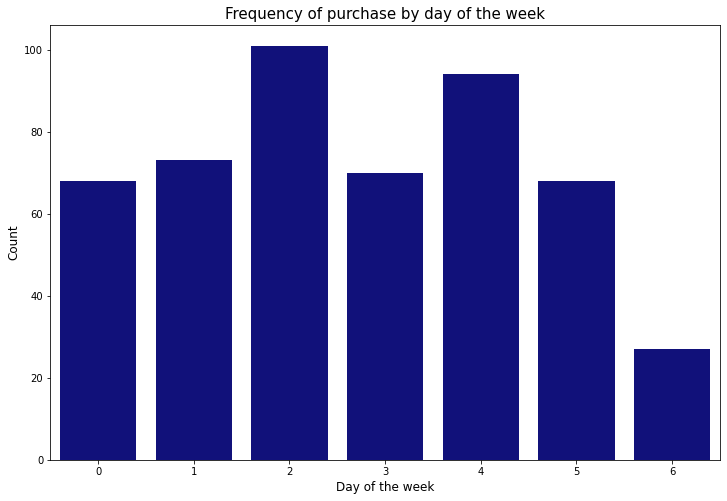

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x="Day of the Week", data=data_units, color='darkblue')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of the week', fontsize=12)
plt.title("Frequency of purchase by day of the week", fontsize=15)
plt.show()

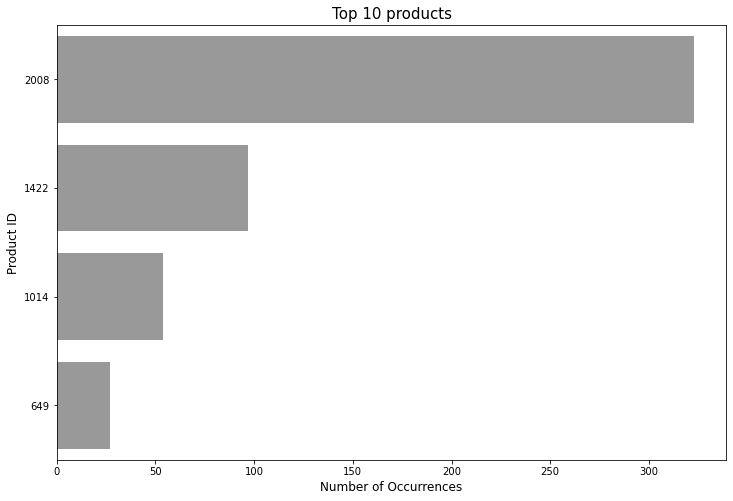

In [12]:
cnt = data_units['ProductName_ID'].value_counts()[:10]
plt.figure(figsize=(12,8))
sns.barplot(cnt.values, cnt.index, alpha=0.8, color='gray')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Product ID', fontsize=12)
plt.title("Top 10 products", fontsize=15)
plt.show()

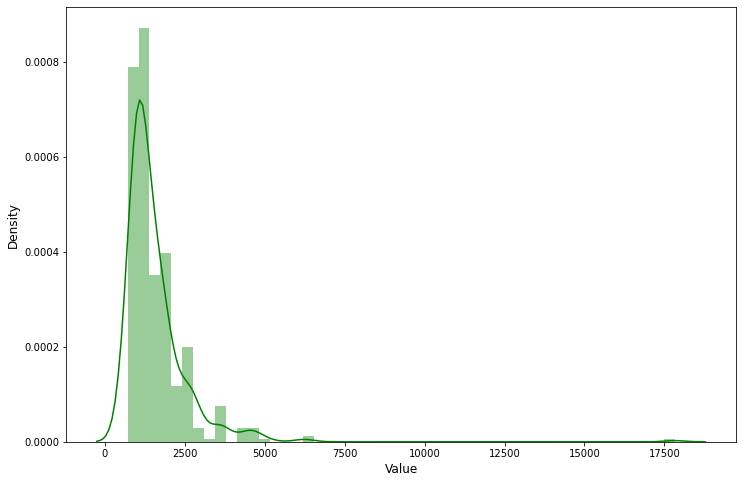

In [13]:
plt.figure(figsize=(12,8))
sns.distplot(data_values['Value'], color='green')
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

### Point-of-sale

####  Quarterly analysis
###### January, February, and March (Q1)
###### April, May, and June (Q2)
###### July, August, and September (Q3)
###### October, November, and December (Q4)